In [43]:
import pandas as pd
import statistics
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from random import randint as rnd
from scipy import stats
import scipy.stats as sts

In [6]:
# 1. Загрузить данные из файла insurance.csv
df = pd.read_csv('insurance.csv')

In [5]:
# 2. Использовать метод describe() для просмотра основной статистики
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


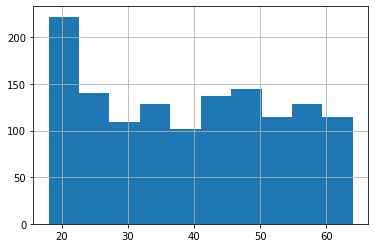

In [10]:
# 3. Построить гистограммы для каждого столбца
df['age'].hist()

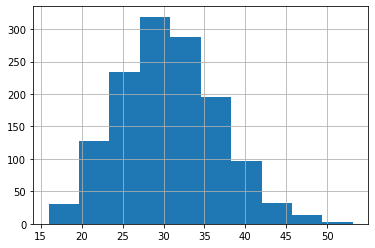

In [9]:
df['bmi'].hist()


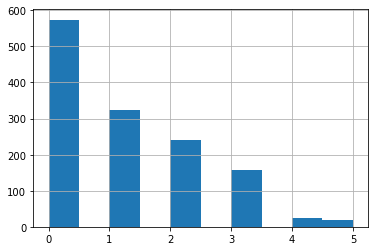

In [11]:
df['children'].hist()

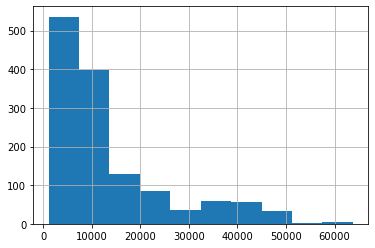

In [12]:
df['charges'].hist()

In [34]:
# 4. Найти меры центральной тенденции и меры разброса для bmi и charges.
sns.displot(df['charges'])
plt.axvline(statistics.mode(df['charges']),label="mode",c='g')
plt.axvline(np.max(df['charges']),label="max",c='r')
plt.axvline(np.min(df['charges']),label="min",c='r')

plt.legend(loc = 'upper left')
plt.show()


AttributeError: module 'seaborn' has no attribute 'displot'

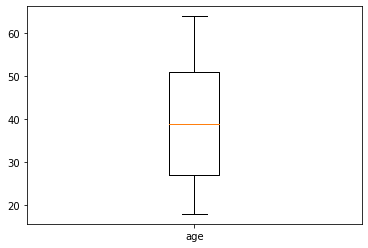

In [21]:
# 5. Построить box-plot для числовых показателей. Названия графиков должны соответствовать названиям признаков.

plt.boxplot([df['age']],labels=['age'])
plt.show()

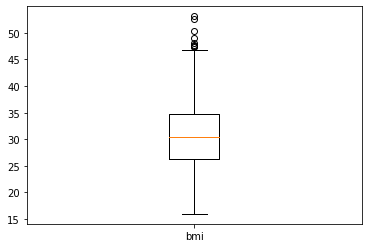

In [18]:
plt.boxplot([df['bmi']],labels=['bmi'])
plt.show()

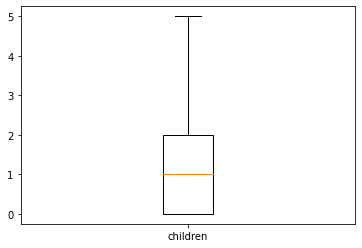

In [19]:
plt.boxplot([df['children']],labels=['children'])
plt.show()

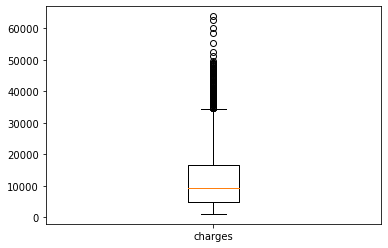

In [20]:
plt.boxplot([df['charges']],labels=['charges'])
plt.show()

 Среднее:  12898.70447352 
 Стандартное отклонение 5508.213491603234


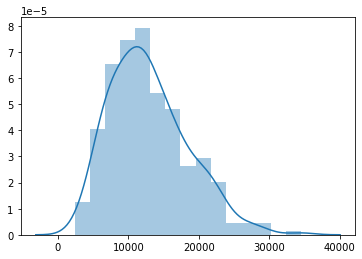

In [29]:
# 6. Используя charges или imb 
# Найти стандартное отклонение и среднее для полученных распределений.
# Использовать различные длины выборок n. Количество выборок = 300. 
# Вывести результат в виде гистограмм. 

charges_arr = []
for i in range(0, 300):
    chargesSample = df['charges'].sample(n=5)
    mean = np.mean(chargesSample)
    charges_arr.append(mean)
fig, ax = plt.subplots()
sns.distplot(charges_arr)
print(" Среднее: ", np.mean(charges_arr), '\n', "Стандартное отклонение", np.std(charges_arr))
plt.show()

 Среднее:  30.660071399999993 
 Стандартное отклонение 0.20140101367513855


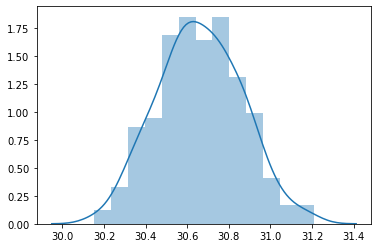

In [25]:
bmi_arr = []
for i in range(0, 300):
    bmiSample = df['bmi'].sample(n=500)
    mean = np.mean(bmiSample)
    bmi_arr.append(mean)
fig, ax = plt.subplots()
sns.distplot(bmi_arr)
print(" Среднее: ", np.mean(bmi_arr),'\n',"Стандартное отклонение", np.std(bmi_arr))
plt.show()

In [35]:
# 7. Построить 95% и 99% доверительный интервал для среднего значения расходов и среднего значения индекса массы тела.



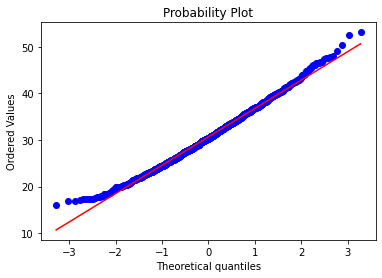

In [36]:
# 8. Проверить распределения следующих признаков на нормальность: индекс массы тела, расходы. 
# Сформулировать нулевую и альтернативную гипотезы. 
# Для каждого признака использовать KS-тест и q-q plot. 
stats.probplot(df['bmi'], dist="norm", plot=plt)
plt.show()

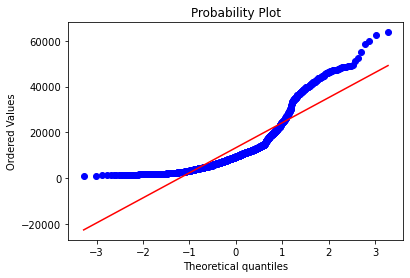

In [37]:
stats.probplot(df['charges'], dist="norm", plot=plt)
plt.show()

In [46]:
loc, scale = sts.norm.fit(df['bmi'])
n = sts.norm(loc=loc, scale=scale)
bmiKStest = sts.kstest(df['bmi'], n.cdf)
print(bmiKStest)

loc, scale = sts.norm.fit(df['charges'])
n = sts.norm(loc=loc, scale=scale)
chargesKStest = sts.kstest(df['charges'], n.cdf)
print(chargesKStest)

KstestResult(statistic=0.02613962682509635, pvalue=0.31453976932347394)
KstestResult(statistic=0.18846204110424236, pvalue=4.39305730768502e-42)
